In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

# Load dataset
data= pd.read_csv("academic_performance.csv")
data


,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1/17/2022 12:45:09,sejal.zambare19@pccoepune.org,Sejal Zambare,sejal.zambare19@gmail.com,TECOC359,72026841K,8208217782,8.40,8.60,9.80,9.90
1,1/17/2022 12:45:44,rushikesh.thorat19@pccoepune.org,Rushikesh Vilas Thorat,rushikesh.thorat19@pccoepune.org,TECOC347,72026776F,9021261925,8.14,8.14,9.32,9.82
2,1/17/2022 12:46:10,atharv.sontakke19@pccoepune.org,Atharv Sontakke,atharv123sontakke@gmail.com,TECOC340,72026742M,9009804629,6.61,6.61,9.14,9.14
3,1/17/2022 12:46:21,amisha.sherekar19@pccoepune.org,Amisha Sunil Sherekar,amisha.sherekar19@pccoepune.org,TECOC328,72026696D,8698227548,7.20,7.30,8.90,9.20
4,1/17/2022 12:46:31,saurabh.sawardekar19@pccoepune.org,Saurabh Raju Sawardekar,saurabh.sawardekar19@pccoepune.org,TECOC326,72026682D,7774072850,7.05,7.45,9.05,9.40
...,...,...,...,...,...,...,...,...,...,...,...
59,1/20/2022 9:24:40,pratik.meshram20@pccoepune.org,Pratik Amrut Meshram,pratik.meshram20@pccoepune.org,TECOC381,72164278M,7666479857,0.00,0.00,9.09,9.36
60,1/20/2022 9:36:14,prasad.zore19@pccoepune.org,Prasad Zore,prasad.zore@outlook.com,TECOC360,72026843F,7387645749,8.31,8.27,9.45,9.77
61,1/20/2022 9:42:34,sudhir.varu19@pccoepune.org,SUDHIR VARU,sudhirvaru01@gmail.com,TECOC351,72026799E,9657017250,8.31,8.42,8.53,8.64
62,1/20/2022 10:22:05,bhagyashree.takale19@pccoepune.org,Bhagyashree Gorakh Takale,bbhagyashree002@gmail.com,TECOC345,72026760K,8805813576,8.70,8.50,8.70,8.80


In [16]:
#First year:   Sem 2
Q1 = np.percentile(data['First year:   Sem 2'], 25)
Q3 = np.percentile(data['First year:   Sem 2'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data['First year:   Sem 2'] < lower_bound) | (data['First year:   Sem 2'] > upper_bound)
print("outlier:",outliers)
A=outliers.sum()
print(A,"\n")
if A==0:
    print("no outlier")
else:
    print("outlier is present")

outlier: 0     False
1     False
2     False
3     False
4     False
      ...  
59     True
60    False
61    False
62    False
63    False
Name: First year:   Sem 2, Length: 64, dtype: bool
6 

outlier is present


In [20]:
from scipy.stats import zscore

numeric_columns = [ 'First year:   Sem 2']
# Calculate z-scores
df_zscore = data[numeric_columns].apply(zscore)

# Define threshold
threshold = 3

# Filter outliers
outlier_indices = (df_zscore > threshold) | (df_zscore < -threshold)
df_no_outliers = data[~outlier_indices.any(axis=1)]

# Display the cleaned DataFrame without outliers
print(df_no_outliers)

             Timestamp                       Email Address  \
0   1/17/2022 12:45:09       sejal.zambare19@pccoepune.org   
1   1/17/2022 12:45:44    rushikesh.thorat19@pccoepune.org   
2   1/17/2022 12:46:10     atharv.sontakke19@pccoepune.org   
3   1/17/2022 12:46:21     amisha.sherekar19@pccoepune.org   
4   1/17/2022 12:46:31  saurabh.sawardekar19@pccoepune.org   
..                 ...                                 ...   
59   1/20/2022 9:24:40      pratik.meshram20@pccoepune.org   
60   1/20/2022 9:36:14         prasad.zore19@pccoepune.org   
61   1/20/2022 9:42:34         sudhir.varu19@pccoepune.org   
62  1/20/2022 10:22:05  bhagyashree.takale19@pccoepune.org   
63  1/20/2022 10:38:06    sarvesh.waghmare19@pccoepune.org   

                         Name                               Email  Roll no   \
0               Sejal Zambare           sejal.zambare19@gmail.com  TECOC359   
1      Rushikesh Vilas Thorat    rushikesh.thorat19@pccoepune.org  TECOC347   
2             Atha

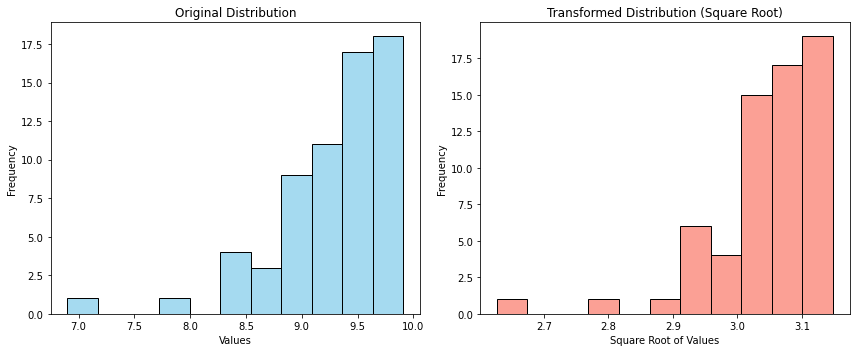

In [26]:
x = data['Second year:   Sem 1']

transformed_data = np.sqrt(x)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(x, color='skyblue')
plt.title('Original Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(transformed_data, color='salmon')
plt.title('Transformed Distribution (Square Root)')
plt.xlabel('Square Root of Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
